In [1]:
import pandas as pd
import numpy as np
from collections import Counter 
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

In [2]:

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv"



df = pd.read_csv(url, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [3]:
# Excluir as colunas 0 e 22
colunas = [0, 22]
df = df.drop(df.columns[colunas], axis=1)

In [23]:
df.columns

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype='int64')

In [4]:


# Agrupar por classe
target = df.values[:,-1]
counter = Counter(target)
for k, v in counter.items():
    per = v / len(target) * 100
    print(f'Classe=%d, Contagem=%d, Porcentagem=%.3f%%' % (k, v, per))

    



Classe=1, Contagem=41, Porcentagem=4.376%
Classe=0, Contagem=896, Porcentagem=95.624%


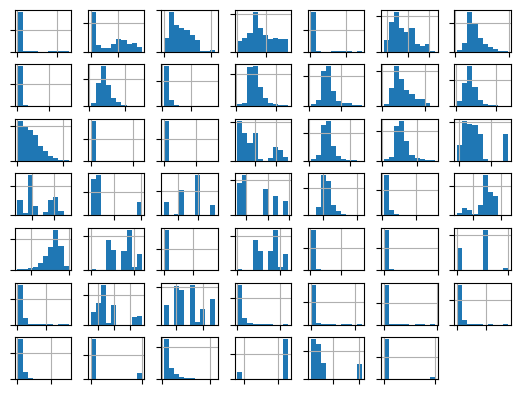

In [5]:
# criar um histograma
ax = df.hist()
for axis in ax.flatten():
    axis.set_title('')
    axis.set_xticklabels([])
    axis.set_yticklabels([])
plt.show()

# Agora que temos uma ideia da distribuição dos dados, podemos prosseguir para a próxima etapa que é definir quais são os possíveis modelos

In [6]:
# Criar um array com os dados
data = df.values

# Criar input e output
X = data[:, :-1]
y = data[:, -1]

# Aplicar label encode na variável alvo para termos as classes 0 e 1
y = LabelEncoder().fit_transform(y)

In [7]:
# Criar função para avaliar o modelo
def evaluate_model(X, y, model):
    # definir o procedimento de avaliação
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # definir a métrica de avaliação
    metric = make_scorer(geometric_mean_score)
    # avaliar o modelo
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

In [8]:
# Para termos uma linha de base vamos criar um modelo que preve com 50% de probabilidade a classe 0 e 1
model = DummyClassifier(strategy='uniform')

# Agora que o modelo está criado podemos verificar a média geométrica e o desvio padrão
scores = evaluate_model(X, y, model)
result_m = scores.mean()
result_s = scores.std()
print('Média geométrica: %.3f (%.3f)' % (result_m, result_s))

# Explicação:
# a média geométrica é de cerca de 0,47, próximo ao máximo teórico de 0,5.
# esse percentual fornece um limite inferior para a performance do modelo.
# qualquer modelo que alcance uma média geométrica acima de 0,47 (ou acima de 0,5) deve ser considerado melhor que o modelo de linha de base.
# se o modelo apresentar uma média geométrica abaixo de 0,47, deve ser considerado pior que o modelo de linha de base.

Média geométrica: 0.467 (0.158)


In [9]:
# Vamos utilizar alguns modelos probabilísticos
# modelos probabilísticos são aqueles que, em vez de prever uma classe diretamente, estimam a probabilidade de cada classe
# os modelos utilizados serão: 
# Logistic Regression - regressão logística (LR)
# Linear Discriminant Analysis - análise discriminante linear (LDA)
# Gaussian Naive Bayes - Naive Bayes Gaussiano (NB)

# os modelos de regressão logística e análise discriminante linear são sensíveis à escala dos dados de entrada
# nestes casos, é importante padronizar os dados antes de treinar o modelo
# para padronizar os dados será utilizado o StandardScaler em um Pipeline. 
# O uso de um Pipeline garante que o StandardScaler seja ajustado no conjunto de dados de treinamento e aplicado aos conjuntos de treino e teste dentro de cada avaliação de validação cruzada em k-fold, evitando qualquer vazamento de dados que possa resultar em um resultado otimista

In [10]:
# definir modelos para testar
def get_models():
    models, names = list(), list()
    # LR
    steps = [('t', StandardScaler()), ('m', LogisticRegression(solver='liblinear'))]
    models.append(Pipeline(steps=steps))
    names.append('LR')
    # LDA
    steps = [('t', StandardScaler()), ('m', LinearDiscriminantAnalysis())]
    models.append(Pipeline(steps=steps))
    names.append('LDA')
    # NB
    models.append(GaussianNB())
    names.append('NB')
    return models, names

models, names = get_models()

# * Modelo LR (Regressão Logística)
# StandardScaler transforma os dados para que tenham média zero e desvio padrão um
# LogisticRegression é um modelo para classificação binária
# o parâmetro (solver='liblinear') define o algoritmo de otimização a ser usado, adequado para datasets pequenos e médios
# Pipeline(steps=steps) é uma forma de encadear transformações e um modelo em um único objeto
    # cria um pipeline com duas etapas: padronização dos dados e aplicação do modelo de regressão logística
# names.append('LR') adiciona o nome 'LR' para identificar esse modelo na avaliação

# * Modelo LDA (Análise Discriminante Linear)
# LinearDiscriminantAnalysis modelo que assume que as classes seguem distribuições gaussianas com a mesma matriz de covariância.
# É um classificador linear que pode ser eficiente em problemas com dados gaussianos.

# * Modelo NB (Naive Bayes Gaussiano)
# GaussianNB é um classificador probabilístico baseado no teorema de Bayes, assumindo que as características seguem uma distribuição normal.
# É simples e eficiente, especialmente em conjuntos de dados pequenos.
# não precisa de escalonamento, pois assume que as características são independentes e seguem uma distribuição normal.

>LR 0.672 (0.203)
>LDA 0.755 (0.147)
>NB 0.707 (0.202)


C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_14728\440776348.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, showmeans=True)


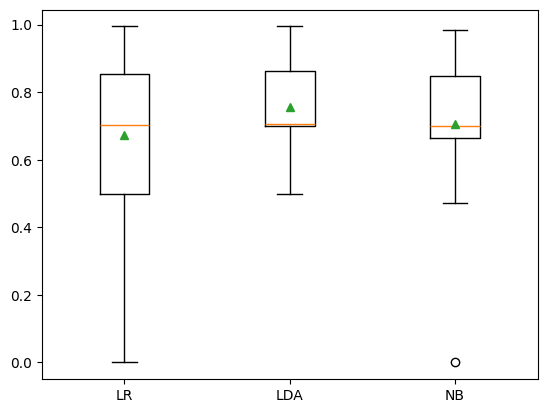

In [11]:
# avaliação dos modelos
results = list()
for i in range(len(models)):
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()
# os resultados sugerem que o modelo LDA pode ser o melhor 


### Algumas consideraçõe sobre regressão logística
Em problemas com classes desbalanceadas (uma classe tem muito mais exemplos que a outra), o modelo pode acabar ignorando a classe minoritária porque ela aparece pouco e o erro dela pesa pouco no cálculo total.


### O parâmetro class_weight='balanced'
Ele ajusta automaticamente o peso dos erros para cada classe, de forma inversamente proporcional à frequência da classe.
Ou seja, erros na classe minoritária (menos frequente) passam a ter mais peso na função de custo do modelo.
Isso força o modelo a prestar mais atenção na classe minoritária, melhorando a capacidade de identificá-la.

Sem esse ajuste, o modelo pode simplesmente "chutar" a classe majoritária para acertar mais, prejudicando a detecção da minoritária.
Com o ajuste, o modelo tenta equilibrar o desempenho entre as classes.
Isso geralmente melhora métricas que consideram o equilíbrio, como a média geométrica (G-mean), que avalia o desempenho em ambas as classes.

Regressão logística é sensível à escala das variáveis de entrada e pode ter um desempenho melhor quando aplicamos processos de normalização e padronização dos dados. Além disso, também será aplicado o processo de transformação de potência

### Preparação dos dados
Serão aplicados 3 métodos 
- normalização (MinMaxScaler)
- padronização (StandardScaler)
- transformação de potência (método de Yeo-Johnson)

#### normalização
- ajusta os dados para um intervlo fixo, geralmente entre 0 e 1
- útil para colocar todas as variáveis na mesma escala

#### padronização
- ajusta os dados para que tenham média zero e desvio padrão 1
- ajuda modelos que assumem dados com distribuição normal

#### transformação de potência
- Transforma os dados para que fiquem mais próximos de uma distribuição normal (gaussiana).
- O método Yeo-Johnson é especial porque funciona com dados que podem ter valores negativos ou zero.
- Além disso, essa transformação já inclui uma padronização automática após a transformação.




In [12]:
# definir modelos para testar
def get_models():
    models, names = list(), list()
    # Regressão logística balanceada
    models.append(LogisticRegression(solver='liblinear', class_weight='balanced'))
    names.append('Balanced')
    # Regressão logística balanceada com MinMaxScaler
    steps = [('t', MinMaxScaler()), ('m', LogisticRegression(solver='liblinear', class_weight='balanced'))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Norm')
    # Regressão logística balanceada com StandardScaler
    steps = [('t', StandardScaler()), ('m', LogisticRegression(solver='liblinear', class_weight='balanced'))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Std')
    # Regressão logística balanceada com transformação de potência
    steps = [('t1', MinMaxScaler()), ('t2', PowerTransformer()), ('m', LogisticRegression(solver='liblinear', class_weight='balanced'))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Power')
    return models, names

>Balanced 0.831 (0.130)
>Balanced-Norm 0.836 (0.088)
>Balanced-Std 0.834 (0.129)
>Balanced-Power 0.862 (0.124)


C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_14728\945559479.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, showmeans=True)


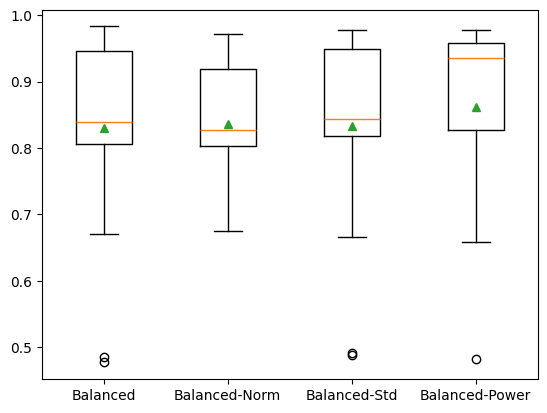

In [13]:

# * definir os modelos que serão avaliados
models, names = get_models()


# * Avaliar o resultado dos modelos de regressão logística
results = list()
for i in range(len(models)):
    # avaliar modelos e resultados
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    # apresentar resultado
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Média (mean)

- A média é o **valor médio** da métrica (no seu caso, a média geométrica ou outra métrica usada) calculada em todas as rodadas da validação cruzada.
- Ela representa o **desempenho esperado** do modelo em dados novos, ou seja, uma estimativa geral de quão bem o modelo está performando.
- Exemplo: média 0.86 significa que, em média, o modelo acertou ou teve uma boa performance em 86% das vezes (dependendo da métrica).

---

### Desvio padrão (standard deviation)

- O desvio padrão mede a **variação ou dispersão** dos resultados em torno da média.
- Um desvio padrão baixo indica que o desempenho do modelo foi **consistente** em todas as rodadas da validação cruzada.
- Um desvio padrão alto indica que o desempenho **variou bastante** entre as rodadas, ou seja, o modelo pode ser instável ou sensível a diferentes subconjuntos dos dados.
- Exemplo: desvio padrão 0.12 significa que os resultados individuais ficaram, em geral, dentro de 12 pontos percentuais acima ou abaixo da média.

---

### Por que isso importa?

- **Média alta + desvio padrão baixo** = modelo com bom desempenho e estável.
- **Média alta + desvio padrão alto** = modelo que pode ter bom desempenho, mas é instável e pode falhar em alguns casos.
- **Média baixa + desvio padrão baixo** = modelo consistentemente ruim.
- **Média baixa + desvio padrão alto** = modelo ruim e instável.

- Por exemplo, para o modelo Balanced-Power com média 0.862 e desvio padrão 0.124:  
  - Em média, o modelo tem desempenho muito bom (86,2%).  
  - Mas o desempenho pode variar cerca de 12,4% para mais ou para menos dependendo do subconjunto de dados usado.



### O que significa o valor da métrica?

- A **média geométrica** mede o equilíbrio entre a capacidade do modelo de identificar corretamente as duas classes (positiva e negativa).
- Um valor de 0,862 indica que o modelo tem um bom equilíbrio entre sensibilidade (acertar os positivos) e especificidade (acertar os negativos).
- Não significa que o modelo acertou 86,2% das previsões totais, mas que ele tem um desempenho equilibrado e consistente entre as classes.
- Em problemas com classes desbalanceadas (uma classe muito maior que a outra), simplesmente acertar a classe majoritária muitas vezes não é suficiente.
- Métricas como a média geométrica ajudam a garantir que o modelo também esteja acertando a classe minoritária, que é importante.
- O valor 0,862 é uma **pontuação de desempenho** que indica que o modelo está equilibrado e performando bem nas duas classes.
- Não é uma porcentagem direta de acertos, mas uma medida que combina vários aspectos do desempenho.


### Avaliar a Amostragem de Dados com Modelos Probabilísticos

- A amostragem de dados fornece uma maneira de preparar melhor o conjunto de dados de treinamento desbalanceado antes de ajustar um modelo. 

- Utilizaremos a técnica de superamostragem SMOTE para criar novos exemplos sintéticos para a classe minoritária. Isso pode ser combinado com o algoritmo de vizinho mais próximo editado (ENN), que localizará e removerá exemplos do conjunto de dados que são ambíguos, facilitando para os modelos aprenderem a discriminar entre as duas classes. 

- Essa combinação é chamada de SMOTE-ENN e pode ser implementada usando a classe SMOTEENN da biblioteca imbalanced-learn.

In [14]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

# Definir o modelo SMOTE-ENN
e = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))

# SMOTE e ENN funcionam melhor quando os dados de entrada são escalonados previamente.
# Isso ocorre porque ambas as técnicas envolvem o uso do algoritmo do vizinho mais próximo internamente e esse algoritmo é sensível a variáveis de entrada com escalas diferentes.
# Portanto, precisamos que os dados sejam normalizados como primeiro passo
# Depois pegaremos uma amotra e então utilizaremos como entrada no modelo de regressão logística
# Utilizaremos a classe Pipeline para criar uma sequência de transformações de dados, incluíndo o método de amostragem de dados e o modelo de regressão



In [15]:
# define models to test
def get_models():
    models, names = list(), list()
    # SMOTEENN
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    model = LogisticRegression(solver='liblinear')
    steps = [('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('LR')
    # SMOTEENN + Norm
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    model = LogisticRegression(solver='liblinear')
    steps = [('t', MinMaxScaler()), ('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('Norm')
    # SMOTEENN + Std
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    model = LogisticRegression(solver='liblinear')
    steps = [('t', StandardScaler()), ('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('Std')
    # SMOTEENN + Power
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    model = LogisticRegression(solver='liblinear')
    steps = [('t1', MinMaxScaler()), ('t2', PowerTransformer()), ('e', sampling), ('m',
    model)]
    models.append(Pipeline(steps=steps))
    names.append('Power')
    return models, names


>LR 0.849 (0.116)
>Norm 0.820 (0.122)
>Std 0.830 (0.123)
>Power 0.879 (0.121)


C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_14728\3453874708.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, showmeans=True)


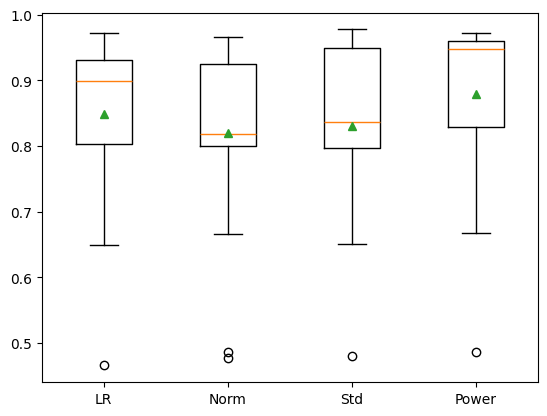

In [16]:

# * definir os modelos que serão avaliados
models, names = get_models()


# * Avaliar o resultado dos modelos de regressão logística
results = list()
for i in range(len(models)):
    # avaliar modelos e resultados
    scores = evaluate_model(X, y, models[i])
   
    # apresentar resultado
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
    results.append(scores)

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [17]:
# Os resultados sugerem que a combinação de normalização, transformação de potência e o método SMOTE-ENN resultaram em um desempenho superior 
# Com média geométrica de 0.882 e desvio padrão de 0.120


### Fazer previsão em novos dados

- modelo SMOTEENN com regressão logística sem qualquer escalonamento de dados é o modelo mais simples e de melhor desempenho
- média geométrica de 0,852
- este será o modelo utilizado para fazer previsões

In [18]:
# modelo final
smoteen = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
model = LogisticRegression(solver='liblinear')
pipeline = Pipeline(steps=[('e', smoteen), ('m', model)])

# ajuste do modelo
pipeline.fit(X, y)

# agora que o modelo está ajustado, podemos fazer previsões para novos dados
# o modelo retornará o rótulo de classe 0 para sem vazamento de óleo
# ou 1 para vazamento de óleo



,steps,"[('e', ...), ('m', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,None
,smote,None
,enn,EditedNearest...gy='majority')
,n_jobs,None
,sampling_strategy,'majority'
,n_neighbors,3


In [24]:
# Selecionar alguns exemplos da classe 0 e da classe 1
# Exemplo: pegar 3 amostras da classe 0 e 3 da classe 1
exemplos_0 = X[y == 0][:3]
exemplos_1 = X[y == 1][:3]

# Mostrar os exemplos para inspeção
print("Exemplos classe 0:")
print(exemplos_0)

print("\nExemplos classe 1:")
print(exemplos_1)

Exemplos classe 0:
[[ 2.232500e+04  7.911000e+01  8.410300e+02  1.800000e+02  5.581250e+07
   5.111000e+01  1.210000e+00  6.190000e+04  2.000000e-02  9.017000e+02
   2.000000e-02  3.000000e-02  1.100000e-01  1.000000e-02  1.100000e-01
   6.058230e+03  4.061150e+03  2.300000e+00  2.000000e-02  2.000000e-02
   8.765000e+01  5.800000e-01  1.327800e+02 -1.000000e-02  3.780000e+00
   8.400000e-01  7.090000e+00 -2.210000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  7.040000e+02  4.014000e+04  0.000000e+00
   6.865000e+01  8.900000e+01  6.900000e+01  5.750000e+03  1.150000e+04
   9.593480e+03  1.648800e+03  6.000000e-01  0.000000e+00  5.157204e+04
   6.573000e+01  6.260000e+00]
 [ 3.120000e+02  9.502700e+02  4.408600e+02  3.700000e+01  7.800000e+05
   4.143000e+01  7.030000e+00  3.350000e+03  1.700000e-01  2.328000e+02
   1.500000e-01  1.900000e-01  3.500000e-01  9.000000e-02  2.600000e-01
   2.891900e+02  4.868000e+01  1.860000e+00  1.300000e-01  1.600000e-01
   8.765000e+0

In [25]:
for i, row in enumerate(exemplos_0):
    yhat = pipeline.predict([row])
    print(f'Classe 0 - Exemplo {i+1}: Predição = {yhat[0]} (esperado 0)')

for i, row in enumerate(exemplos_1):
    yhat = pipeline.predict([row])
    print(f'Classe 1 - Exemplo {i+1}: Predição = {yhat[0]} (esperado 1)')

Classe 0 - Exemplo 1: Predição = 0 (esperado 0)
Classe 0 - Exemplo 2: Predição = 1 (esperado 0)
Classe 0 - Exemplo 3: Predição = 1 (esperado 0)
Classe 1 - Exemplo 1: Predição = 1 (esperado 1)
Classe 1 - Exemplo 2: Predição = 1 (esperado 1)
Classe 1 - Exemplo 3: Predição = 1 (esperado 1)
